# **Customer Segmentation Analysis**






# Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Loading Dataset

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Exploratory Data Analysis (EDA)**

In [ ]:
df.shape


(200, 5)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Checking missing values:

In [ ]:
df.isnull().sum()


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.rename(columns={
    'Annual Income (k$)': 'Annual_Income',
    'Spending Score (1-100)': 'Spending_Score'
}, inplace=True)


# Gender Distribution

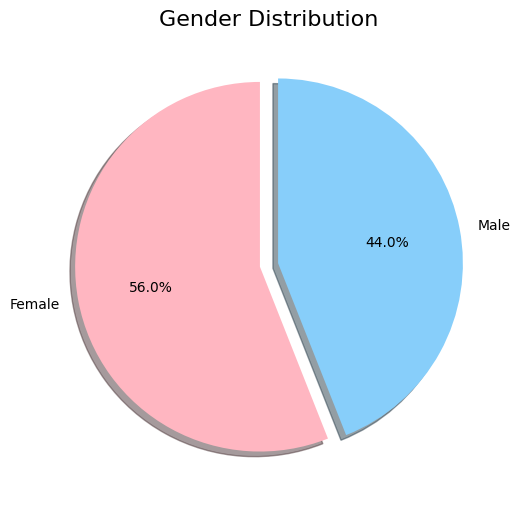

In [ ]:
gender_counts = df['Gender'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    colors=['#FFB6C1', '#87CEFA'],
    startangle=90,
    shadow=True,
    explode=(0.05, 0.05)
)
plt.title('Gender Distribution', fontsize=16)
plt.show()



The dataset contains a nearly balanced distribution of male and female customers, ensuring unbiased customer analysis.

# Age Distribution

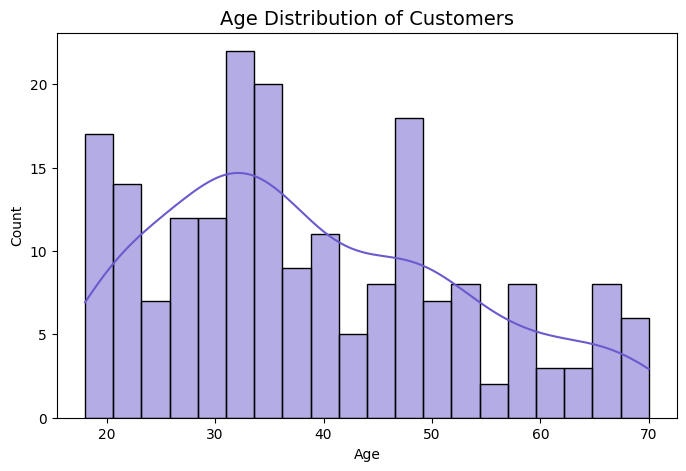

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color='#6A5ACD')
plt.title('Age Distribution of Customers', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Most customers belong to the age group of 20–50 years, indicating a higher presence of working-age individuals in the mall.

# Income vs Spending

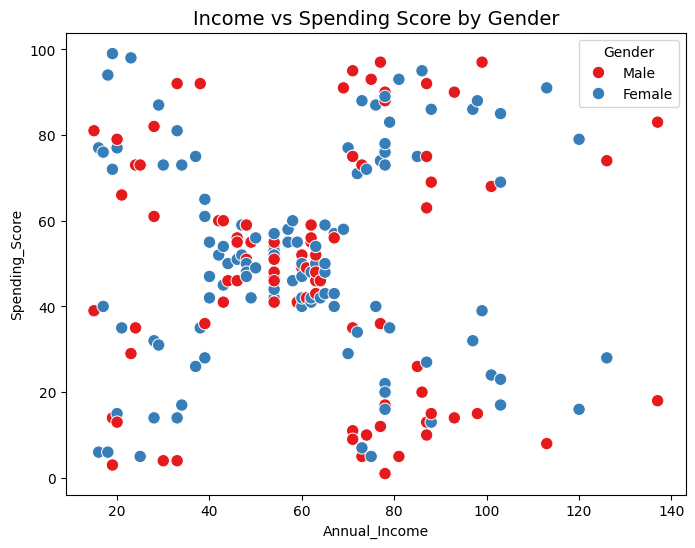

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual_Income',
    y='Spending_Score',
    data=df,
    hue='Gender',
    palette='Set1',
    s=80
)
plt.title('Income vs Spending Score by Gender', fontsize=14)
plt.show()



Customers with similar income levels exhibit significantly different spending behaviors, highlighting the need for segmentation.

# Feature Selection for Clustering

In [ ]:
X = df[['Annual_Income', 'Spending_Score']]


# Feature Scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


# Elbow Method

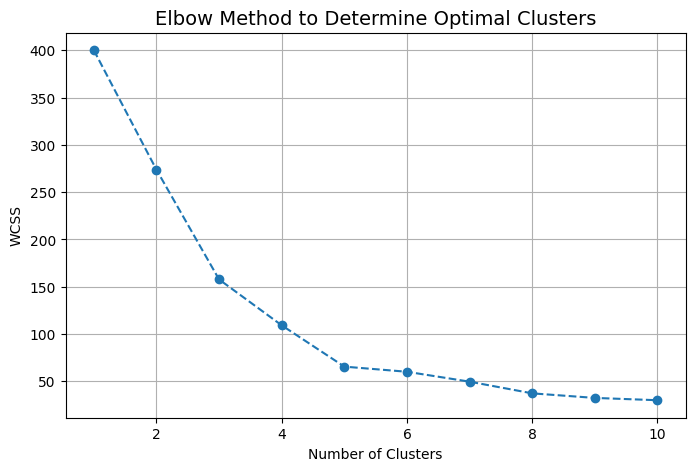

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Clusters', fontsize=14)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()



The elbow point at 5 clusters indicates an optimal balance between model simplicity and clustering accuracy.

# Apply K-Means Clustering

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


# Visualize Customer Segments

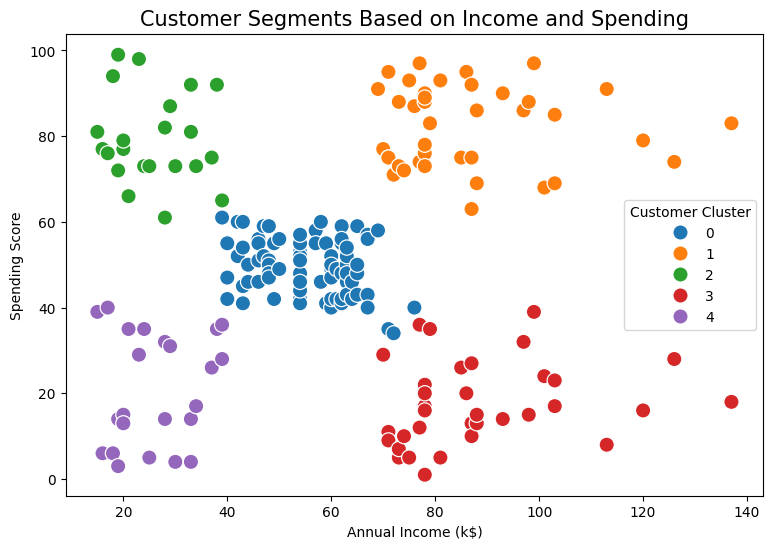

In [ ]:
plt.figure(figsize=(9,6))
sns.scatterplot(
    x='Annual_Income',
    y='Spending_Score',
    hue='Cluster',
    palette='tab10',
    data=df,
    s=120
)
plt.title('Customer Segments Based on Income and Spending', fontsize=15)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend(title='Customer Cluster')
plt.show()



The visualization clearly shows five distinct customer segments formed based on income and spending behavior.

/tmp/ipython-input-1705697832.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


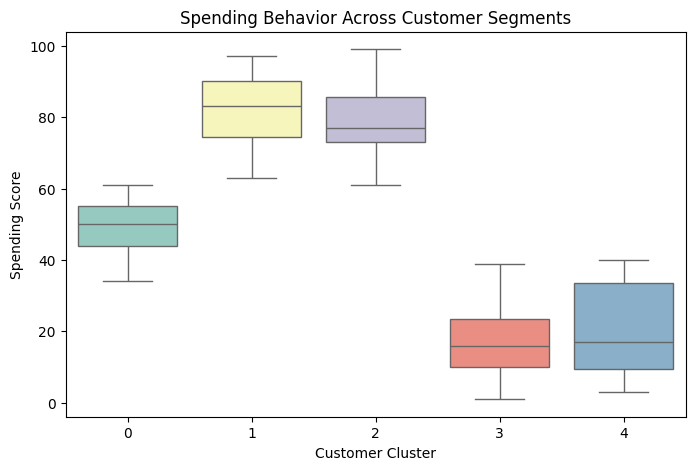

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Cluster',
    y='Spending_Score',
    data=df,
    palette='Set3'
)
plt.title('Spending Behavior Across Customer Segments')
plt.xlabel('Customer Cluster')
plt.ylabel('Spending Score')
plt.show()


The boxplot reveals clear differences in spending patterns across clusters, helping identify high-value and low-value customer groups.

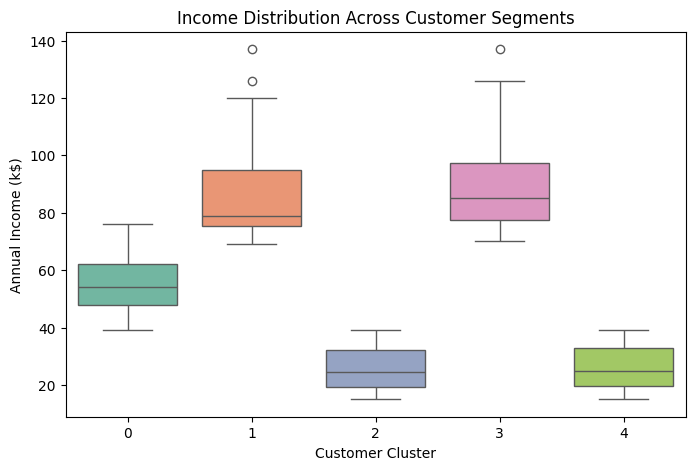

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Cluster',
    y='Annual_Income',
    hue='Cluster',
    data=df,
    palette='Set2',
    legend=False
)
plt.title('Income Distribution Across Customer Segments')
plt.xlabel('Customer Cluster')
plt.ylabel('Annual Income (k$)')
plt.show()


# Cluster Analysis

In [ ]:
df.groupby('Cluster')[['Age', 'Annual_Income', 'Spending_Score']].mean()

,Age,Annual_Income,Spending_Score
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


# Model Evaluation

In [ ]:
silhouette_score(X_scaled, df['Cluster'])


np.float64(0.5546571631111091)

# **CONCLUSION**


*   K-Means clustering was successfully used to segment customers based on annual income and spending behavior.

*   Five distinct customer segments were identified, each representing unique purchasing patterns.

*   The analysis showed that customers with similar income levels can have very different spending habits.

*   Cluster visualizations helped clearly differentiate high-value, moderate, and budget-conscious customers.

*   These insights can help businesses design personalized marketing strategies and improve customer targeting.



